In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import os

### Task 1: Merge the 12 months of sales data into single CSV file

In [98]:
files = [file for file in os.listdir("D:\Technology\Data Science\Projects\Sales Analysis\Sales_Data")]

all_months = pd.DataFrame()

for i in files:
    data = pd.read_csv("D:\Technology\Data Science\Projects\Sales Analysis\Sales_Data/"+i)    
    all_months = pd.concat([all_months,data])


all_months.to_csv("sales.csv",index = False)

### Updated dataframe 

In [99]:
full_data = pd.read_csv("D:\Technology\Data Science\Projects\Sales Analysis\sales.csv")
full_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# Clean up the data

### Task2: Drop Nan values

In [4]:
full_data.isna().any()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [5]:
full_data = full_data.dropna(how='all')
full_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [6]:
full_data.isna().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

### Task3: Drop Or value

In [7]:
full_data = full_data[full_data['Order Date'].str[0:2] != 'Or']
full_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Augmented data with additional columns

### Task4: Add month column

In [8]:
pd.options.mode.chained_assignment = None
full_data['Month'] = full_data['Order Date'].str[0:2]
full_data['Month'] = full_data['Month'].astype(int)
full_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


# 1. Best month of sale

In [9]:
full_data['Quantity Ordered'] = pd.to_numeric(full_data['Quantity Ordered'])
full_data['Price Each'] = pd.to_numeric(full_data['Price Each'])
full_data['Sales'] = full_data['Price Each'] * full_data['Quantity Ordered'] 
sale = full_data.groupby('Month').sum()['Sales']

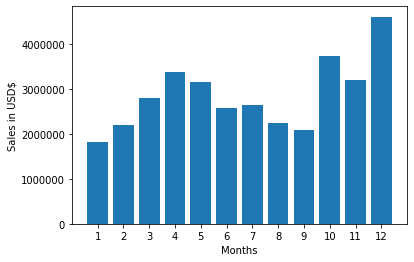

In [10]:
months = range(1,13)
plt.bar(months,sale)
plt.xticks(months)
plt.ylabel('Sales in USD$')
plt.xlabel('Months')
plt.show()

# 2. City with most sale

In [11]:
full_data['City'] = full_data['Purchase Address'].apply(lambda x:x.split(',')[1][1:]) 

In [12]:
city_sale = full_data.groupby('City').sum()

In [13]:
city_sale[city_sale['Sales'] == city_sale['Sales'].max()]

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco,50239,8.211462e+06,315520,8.262204e+06


In [14]:
city_sale.reset_index(inplace = True)
city_sale['City']

0          Atlanta
1           Austin
2           Boston
3           Dallas
4      Los Angeles
5    New York City
6         Portland
7    San Francisco
8          Seattle
Name: City, dtype: object

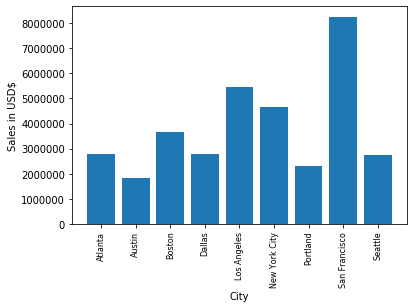

In [15]:
plt.bar(city_sale['City'],city_sale['Sales'])
plt.xticks(city_sale['City'],rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD$')
plt.xlabel('City')
plt.show()

## 3. Best time to advertise for maximizing likelihood of customer buying product

In [16]:
full_data['Order Date'] = pd.to_datetime(full_data['Order Date'])

In [17]:
full_data['Hour'] = full_data['Order Date'].dt.hour
full_data['Minute']  = full_data['Order Date'].dt.minute

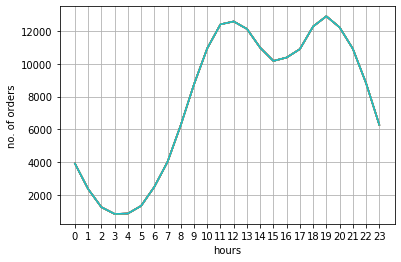

In [18]:
hour = [hour for hour,df in full_data.groupby('Hour')]
plt.plot(hour,full_data.groupby('Hour').count())
plt.xticks(hour)
plt.grid()
plt.ylabel('no. of orders')
plt.xlabel('hours')
plt.show()

## 4. Product most often sold together

In [31]:
df = full_data[full_data['Order ID'].duplicated(keep=False)]
df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df = df[['Grouped','Order ID']].drop_duplicates()
df

,Grouped,Order ID
3,"Google Phone,Wired Headphones",176560
18,"Google Phone,USB-C Charging Cable",176574
30,"Bose SoundSport Headphones,Bose SoundSport Hea...",176585
32,"AAA Batteries (4-pack),Google Phone",176586
119,"Lightning Charging Cable,USB-C Charging Cable",176672
...,...,...
186781,"Apple Airpods Headphones,Apple Airpods Headphones",259296
186783,"iPhone,Lightning Charging Cable,Lightning Char...",259297
186791,"34in Ultrawide Monitor,AA Batteries (4-pack)",259303
186803,"Wired Headphones,AAA Batteries (4-pack)",259314


In [40]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## 5. Which are the most sold products? Why they are sold the most?

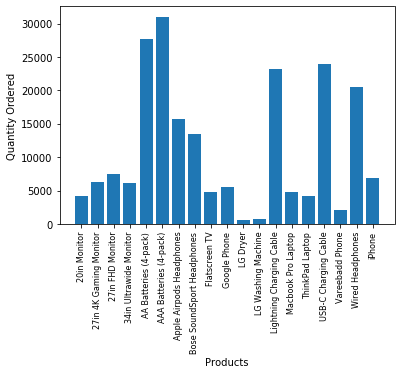

In [61]:
produt_group = full_data.groupby('Product')
quantity = produt_group.sum()['Quantity Ordered']
products = [p for p,df in produt_group]
plt.bar(products,quantity)
plt.xticks(products,rotation = 'vertical', size=8)
plt.ylabel("Quantity Ordered")
plt.xlabel("Products")
plt.show()

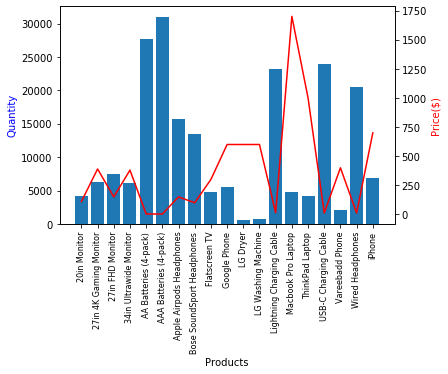

Conclusion: According to graph in most cases low price products have high sales 
           while products with higher prices have comparitively lower sales.


In [92]:
prices = full_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity)
ax2.plot(products,prices,'-r')
ax1.set_xlabel('Products')
ax2.set_ylabel('Price($)',color='r')
ax1.set_ylabel('Quantity',color='b')
ax1.set_xticklabels(products,rotation = 'vertical', size=8)
plt.show()
print("Conclusion: According to graph in most cases low price products have high sales \n           while products with higher prices have comparitively lower sales.")